In [1]:
from IPython.display import Image

# Measuring interrupt response times

Tomaž Šolc, tomaz.solc@tablix.org

https://www.tablix.org/~avian/blog/archives/2016/04/measuring_interrupt_response_times/

https://www.tablix.org/~avian/blog/archives/2016/04/measuring_interrupt_response_times_part_2/

https://www.tablix.org/~avian/blog/archives/2021/05/measuring_interrupt_response_times_part_3/

https://github.com/avian2/interrupt-response-times

## Devices and software
  
* Raspberry Pi Zero
  * Broadcom BCM2835 (ARM11), 1GHz CPU clock
  * pin 17 input, pin 18 output
  * Raspbian Jessie (2016-03-18 SD card image)
  * Python 2.7.9, RPi.GPIO 0.6.2
  * Linux kernel 4.1.19+ 
  
* Arduino Uno
  * ATmega328p microcontroller, 16 MHz CPU clock
  * Arduino IDE 1.0.5
  * pin 2 input, pin 3 output
  
* RP2040 (Raspberry Pi Pico)
  * MicroPython v1.15 on 2021-04-18
  * rshell
  * pin 14 input, pin 15 output

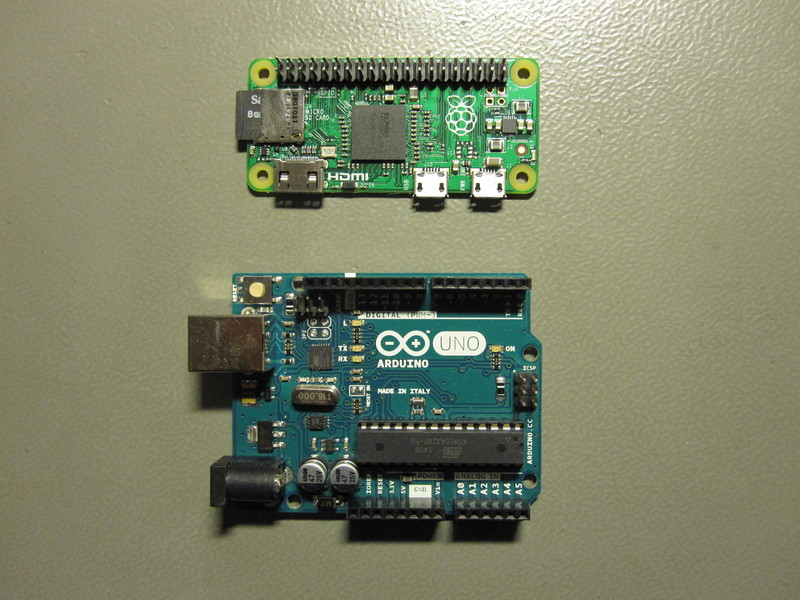

In [2]:
Image(filename='figures/IMG_1543_t.jpg', width="50%")

## Instruments

* GW Instek AFG-2005 arbitrary function generator
  * square wave
  * frequency 10 kHz for Arduino, 100 Hz for Raspberry Pi
  * amplitude 5 Vpp, 2.5 V offset for Arduino, 3.3 Vpp, 1.65 V offset for Raspberry Pi 
* Tektronix TDS 2002B digital storageoscilloscope
  * CH2 connected to input pin, CH1 connected to output pin
  * channel math set to: CH2 - CH1
  * positive pulse width measurement on MATH.

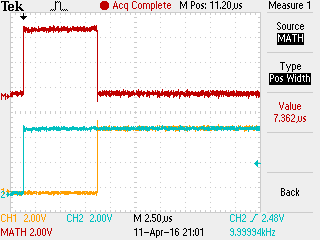

In [3]:
Image(filename='figures/F0000TEK.png')

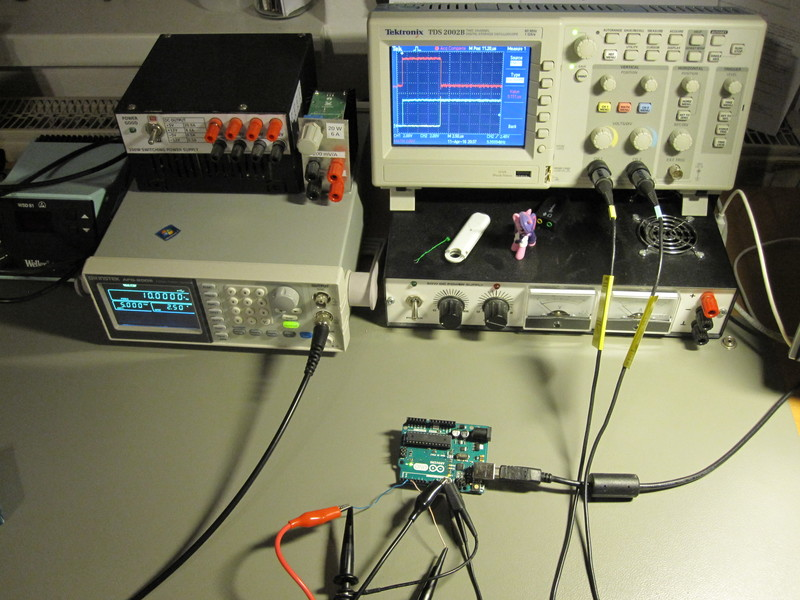

In [4]:
Image(filename='figures/IMG_1539_t.jpg', width="50%")

## Results

In [5]:
t = loadtxt("measurements/01_arduino_polling.out")
N = t.shape[0]
print("N =", N)

N = 500


In [6]:
def analyze_plot(path, label, rang, k, ls='solid', tk=1e6):
    print(path)
    
    data = loadtxt(path)
    
    t = data[:N,1]*1e6
    t1 = t/1e6*tk
    
    print("  tmin =", min(t), "us")
    print("  tavg =", mean(t), "us")
    print("  tmax =", max(t), "us")
    
    noutliers = sum(t < rang[0]) + sum(t > rang[1])
    print("  %d outliers" % (noutliers,))
    
    h, e = histogram(t1, bins=100, range=rang)
    
    x = (e[:-1] + e[1:])/2.
    step(e, [0] + list(h), color=k, label=label, lw=2, linestyle=ls)
    bar(x, h, width=(x[1]-x[0]), color=k, lw=0, alpha=0.2)
    
def analyze(path, titl, rang, k):
    
    analyze_plot(path, titl, rang, k)
    title(titl)
    ylabel("count")
    xlabel("response time $t$ [us]")
    grid()    

measurements/03_rp2040_pio.out
  tmin = 0.038000000000000006 us
  tavg = 0.0426672 us
  tmax = 0.048400000000000006 us
  0 outliers
measurements/01_arduino_irq.out
  tmin = 8.947600000000001 us
  tavg = 9.0672686 us
  tmax = 14.0163 us
  0 outliers
measurements/01_rpi_c_kmod.out
  tmin = 6.0367 us
  tavg = 12.6761142 us
  tmax = 43.778800000000004 us
  0 outliers
measurements/03_rp2040_python.out
  tmin = 54.232099999999996 us
  tavg = 61.169804000000006 us
  tmax = 66.79 us
  0 outliers
measurements/01_rpi_python.out
  tmin = 143.1988 us
  tavg = 212.91293480000002 us
  tmax = 377.40560000000005 us
  14 outliers
measurements/01_rpi_c_userspace.out
  tmin = 179.9882 us
  tavg = 280.50451 us
  tmax = 511.2023 us
  50 outliers


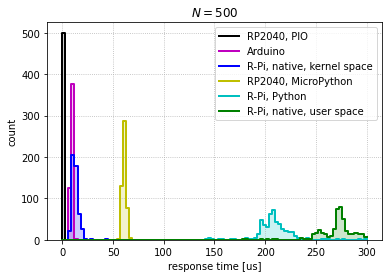

In [7]:
r = (0,300.)
#analyze_plot("measurements/01_arduino_polling.out", "Arduino, polling", r, 'r')
#analyze_plot("measurements/01_arduino_irq.out", "Arduino, IRQ", r, 'm')
analyze_plot("measurements/03_rp2040_pio.out", "RP2040, PIO", r, 'k')
analyze_plot("measurements/01_arduino_irq.out", "Arduino", r, 'm')
analyze_plot("measurements/01_rpi_c_kmod.out", "R-Pi, native, kernel space", r, 'b')
analyze_plot("measurements/03_rp2040_python.out", "RP2040, MicroPython", r, 'y')
analyze_plot("measurements/01_rpi_python.out", "R-Pi, Python", r, 'c')
analyze_plot("measurements/01_rpi_c_userspace.out", "R-Pi, native, user space", r, 'g')
legend(loc="upper right")
title("$N = %d$" % (N,))
ylabel("count")
xlabel("response time [us]")
grid(ls=':')

#savefig("figout/histogram.png", bbox_inches='tight', dpi=300)

measurements/01_arduino_polling.out
  tmin = 6.6675 us
  tavg = 8.6581148 us
  tmax = 14.893699999999999 us
  0 outliers
measurements/01_arduino_irq.out
  tmin = 8.947600000000001 us
  tavg = 9.0672686 us
  tmax = 14.0163 us
  0 outliers
measurements/01_rpi_c_kmod.out
  tmin = 6.0367 us
  tavg = 12.6761142 us
  tmax = 43.778800000000004 us
  8 outliers
measurements/03_rp2040_pio.out
  tmin = 0.038000000000000006 us
  tavg = 0.0426672 us
  tmax = 0.048400000000000006 us
  0 outliers


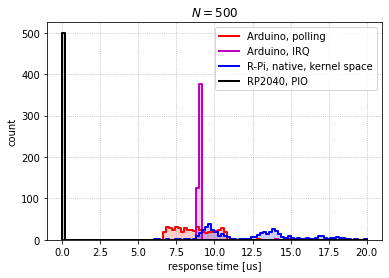

In [8]:
r = (0,20.)
analyze_plot("measurements/01_arduino_polling.out", "Arduino, polling", r, 'r')
analyze_plot("measurements/01_arduino_irq.out", "Arduino, IRQ", r, 'm')
analyze_plot("measurements/01_rpi_c_kmod.out", "R-Pi, native, kernel space", r, 'b')
analyze_plot("measurements/03_rp2040_pio.out", "RP2040, PIO", r, 'k')
legend(loc="upper right")
title("$N = %d$" % (N,))
ylabel("count")
xlabel("response time [us]")
grid(ls=':')

#savefig("figout/histogram_zoom.png", bbox_inches='tight', dpi=300)

measurements/03_rp2040_pio.out
  tmin = 0.038000000000000006 us
  tavg = 0.0426672 us
  tmax = 0.048400000000000006 us
  0 outliers


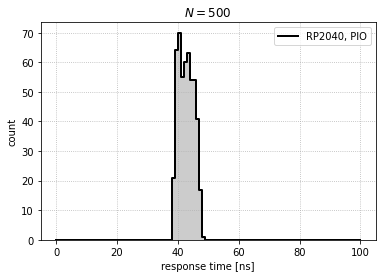

In [9]:
r = (0,100)
analyze_plot("measurements/03_rp2040_pio.out", "RP2040, PIO", r, 'k', tk=1e9)
#analyze_plot("measurements/03_rp2040_pio_sideset.out", "R-Pi Pico, pio sideset", r, 'm')
legend(loc="upper right")
title("$N = %d$" % (N,))
ylabel("count")
xlabel("response time [ns]")
grid(ls=':')

savefig("figout2/histogram_zoom_pio.png", bbox_inches='tight', dpi=300)

The measurement for the response time of the RP2040 PIO implementation isn't accurate. The rise time of the stimulus signal (CH2, blue trace) is not insignificant compared to the response time.

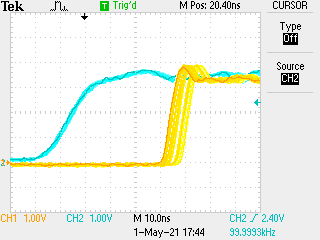

In [10]:
Image(filename='figures/F0018TEK.png')

### Effect of CPU load

CPU was loaded by running `"while true; do true; done"` in a SSH session.

Frequency scaling governor was set to `ondemand`.

measurements/01_rpi_python.out
  tmin = 143.1988 us
  tavg = 212.91293480000002 us
  tmax = 377.40560000000005 us
  0 outliers
measurements/01_rpi_python_busy.out
  tmin = 152.4069 us
  tavg = 164.04639419999998 us
  tmax = 357.6117 us
  0 outliers


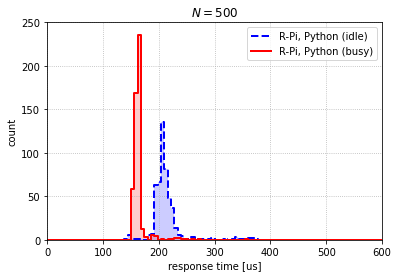

In [11]:
r = (0,600.)

analyze_plot("measurements/01_rpi_python.out", "R-Pi, Python (idle)", r, 'b', ls='dashed')
analyze_plot("measurements/01_rpi_python_busy.out", "R-Pi, Python (busy)", r, 'r')

legend(loc="upper right")
title("$N = %d$" % (N,))
ylabel("count")
xlabel("response time [us]")
axis([0, 600, 0, 250])
grid(ls=':')

#savefig("figout/busy_python.png", bbox_inches='tight', dpi=300)

measurements/01_rpi_c_userspace.out
  tmin = 179.9882 us
  tavg = 280.50451 us
  tmax = 511.2023 us
  0 outliers
measurements/01_rpi_c_userspace_busy.out
  tmin = 189.21159999999998 us
  tavg = 1.9799999999999997e+41 us
  tmax = 9.899999999999998e+43 us
  1 outliers


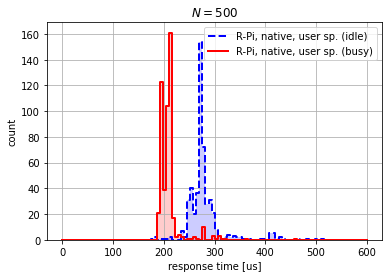

In [12]:
r = (0,600.)

analyze_plot("measurements/01_rpi_c_userspace.out", "R-Pi, native, user sp. (idle)", r, 'b', ls='dashed')
analyze_plot("measurements/01_rpi_c_userspace_busy.out", "R-Pi, native, user sp. (busy)", r, 'r')

legend(loc="upper right")
title("$N = %d$" % (N,))
ylabel("count")
xlabel("response time [us]")
grid()

#savefig("figout/busy_native.png", bbox_inches='tight')

measurements/01_rpi_c_kmod.out
  tmin = 6.0367 us
  tavg = 12.6761142 us
  tmax = 43.778800000000004 us
  0 outliers
measurements/01_rpi_c_kmod_busy.out
  tmin = 4.761299999999999 us
  tavg = 7.6975928 us
  tmax = 16.1193 us
  0 outliers


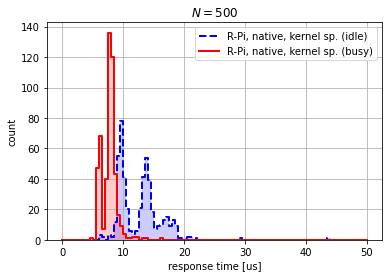

In [13]:
r = (0,50.)

analyze_plot("measurements/01_rpi_c_kmod.out", "R-Pi, native, kernel sp. (idle)", r, 'b', ls='dashed')
analyze_plot("measurements/01_rpi_c_kmod_busy.out", "R-Pi, native, kernel sp. (busy)", r, 'r')

legend(loc="upper right")
title("$N = %d$" % (N,))
ylabel("count")
xlabel("response time [us]")
grid()

#savefig("figout/busy_kmod.png", bbox_inches='tight')

### Effect of CPU frequency scaling governor

In [14]:
# second set of measurements starts here
t = loadtxt("measurements/02_rpi_c_userspace.out")
N = t.shape[0]
print("N =", N)

N = 1000


measurements/02_rpi_c_userspace_performance_busy.out
  tmin = 191.6 us
  tavg = 215.10739420000002 us
  tmax = 358.78000000000003 us
  0 outliers
measurements/02_rpi_c_userspace_performance.out
  tmin = 156.0024 us
  tavg = 9.899999999999999e+40 us
  tmax = 9.899999999999998e+43 us
  2 outliers
measurements/02_rpi_c_userspace_busy.out
  tmin = 195.2095 us
  tavg = 9.899999999999999e+40 us
  tmax = 9.899999999999998e+43 us
  1 outliers
measurements/02_rpi_c_userspace.out
  tmin = 182.39530000000002 us
  tavg = 9.899999999999999e+40 us
  tmax = 9.899999999999998e+43 us
  3 outliers


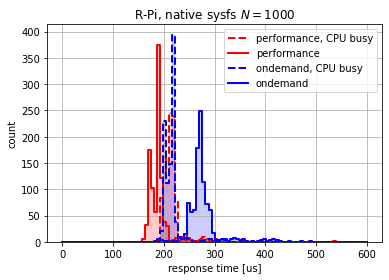

In [15]:
r = (0,600.)

analyze_plot("measurements/02_rpi_c_userspace_performance_busy.out", "performance, CPU busy", r, 'r', ls='dashed')
analyze_plot("measurements/02_rpi_c_userspace_performance.out", "performance", r, 'r')
analyze_plot("measurements/02_rpi_c_userspace_busy.out", "ondemand, CPU busy", r, 'b', ls='dashed')
analyze_plot("measurements/02_rpi_c_userspace.out", "ondemand", r, 'b')

legend(loc="upper right")
title("R-Pi, native sysfs $N = %d$" % (N,))
ylabel("count")
xlabel("response time [us]")
grid()

#savefig("figout/governor.png", bbox_inches='tight', dpi=300)

### Comparing sysfs GPIO interface and mmap method

measurements/02_rpi_c_mmap.out
  tmin = 81.79769999999999 us
  tavg = 9.899999999999999e+40 us
  tmax = 9.899999999999998e+43 us
  1 outliers
measurements/02_rpi_python.out
  tmin = 144.0144 us
  tavg = 216.61969889999997 us
  tmax = 398.41159999999996 us
  0 outliers
measurements/02_rpi_c_userspace.out
  tmin = 182.39530000000002 us
  tavg = 9.899999999999999e+40 us
  tmax = 9.899999999999998e+43 us
  3 outliers


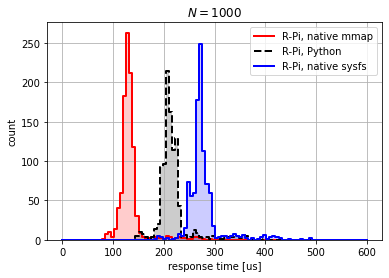

In [16]:
r = (0,600.)
analyze_plot("measurements/02_rpi_c_mmap.out", "R-Pi, native mmap", r, 'r')
analyze_plot("measurements/02_rpi_python.out", "R-Pi, Python", r, 'k', ls='dashed')
analyze_plot("measurements/02_rpi_c_userspace.out", "R-Pi, native sysfs", r, 'b')

legend(loc="upper right")
title("$N = %d$" % (N,))
ylabel("count")
xlabel("response time [us]")
grid()

#savefig("figout/sysfs_vs_mmap.png", bbox_inches='tight', dpi=300)

### Effect of Arduino timer interrupt

Library keeps timer/counter0 overflow interrupt enabled at all times for use in delay functions.

measurements/02_arduino_irq.out
  tmin = 8.947700000000001 us
  tavg = 9.064952499999999 us
  tmax = 14.997 us
  0 outliers
measurements/02_arduino_irq_notim.out
  tmin = 8.948500000000001 us
  tavg = 9.052612100000001 us
  tmax = 9.1986 us
  0 outliers


(-1.0, 21.0, 0.0, 10.0)

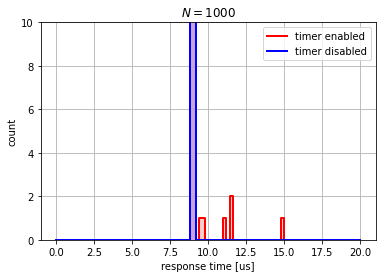

In [17]:
r = (0,20.)
analyze_plot("measurements/02_arduino_irq.out", "timer enabled", r, 'r')
analyze_plot("measurements/02_arduino_irq_notim.out", "timer disabled", r, 'b')

legend(loc="upper right")
title("$N = %d$" % (N,))
ylabel("count")
xlabel("response time [us]")
grid()
axis([None, None, 0, 10])

#savefig("figout/arduino_timer.png", bbox_inches='tight', dpi=300)